In [1]:
# First, we create empty dictionaries. These dictionaries are used to track what books to recommend, what books to buy, and what books not to recommend to users
recommends_this_book={}
bought_this_book={}
doesnot_recommend={}

In [2]:
import pandas as pd
df=pd.read_csv("Preprocessed_data.csv")

In [3]:
df.head(1)

Unnamed: 0  user_id                   location   age        isbn  rating  \
0           0        2  stockton, california, usa  18.0  0195153448       0   

            book_title         book_author  year_of_publication  \
0  Classical Mythology  Mark P. O. Morford               2002.0   

                 publisher                                              img_s  \
0  Oxford University Press  http://images.amazon.com/images/P/0195153448.0...   

                                               img_m  \
0  http://images.amazon.com/images/P/0195153448.0...   

                                               img_l  \
0  http://images.amazon.com/images/P/0195153448.0...   

                                             Summary Language  \
0  Provides an introduction to classical myths pl...       en   

             Category      city       state country  
0  ['Social Science']  stockton  california     usa

In [4]:
import numpy as np
# First, we create empty dictionaries. These dictionaries are used to track
# what books to recommend, what books to buy, and what books not to recommend to users
uid=df.iloc[:,1].values.tolist()
rating=df.iloc[:,5].values.tolist()
title=df.iloc[:,6].values.tolist()

In [5]:
# Iterate through the data to determine what books to recommend, buy, or not recommend to users.
total=len(uid)
for i in range(total):
    user=uid[i]
    book=title[i]
    if(rating[i]>7.5):
        try:
            recommends_this_book[user].append(book)
        except:
            recommends_this_book[user]=[book]
    elif(rating[i]<=7.5 and rating[i]>5):
        try:
            bought_this_book[user].append(book)
        except:
            bought_this_book[user]=[book]
    else:
        try:
            doesnot_recommend[user].append(book)
        except:
            doesnot_recommend[user]=[book]

In [6]:
recommends=recommends_this_book.values()

In [7]:
recommends

dict_values([['Clara Callan', "The Kitchen God's Wife", 'PLEADING GUILTY', 'The Testament', 'Beloved (Plume Contemporary Fiction)', 'New Vegetarian: Bold and Beautiful Recipes for Every Occasion', 'Timeline', 'Death in the Clouds', 'Prelude to Foundation (Foundation Novels (Paperback))', 'Prague : A Novel', 'Seabiscuit: An American Legend', 'Downtown', "I'll Be Seeing You", 'Purity in Death', "Left Behind: A Novel of the Earth's Last Days (Left Behind #1)", 'The Street Lawyer', 'The Tao of Pooh', "Life's Little Instruction Book (Life's Little Instruction Books (Paperback))", 'The Five People You Meet in Heaven', 'The Short Forever', 'Every Breath You Take : A True Story of Obsession, Revenge, and Murder', 'The Mosquito Coast', 'The Girl Who Loved Tom Gordon', 'One Hundred Years of Solitude', 'Coyote Waits (Joe Leaphorn/Jim Chee Novels)', 'Before I Say Good-Bye', 'Diary of a Mad Mom-To-Be', 'Wish You Well', 'Crow Lake (Today Show Book Club #7)', 'Veronika Deschliesst Zu Sterben / Vernik

In [8]:
# Extract lists of recommended, bought, and not recommended books.
recommends=list(recommends_this_book.values())
bought=list(bought_this_book.values())
wont_recommend=list(doesnot_recommend.values())

In [14]:
from apyori import apriori

In [15]:
recommends[1]

['Clara Callan',
 "The Pilot's Wife : A Novel",
 'Daughter of Fortune: A Novel',
 'Prayer for Owen Meany']

In [16]:
# Generate association rules for the list of recommended books using the Apriori algorithm.
recommended=list(apriori(transactions=recommends,min_support=0.0003,min_confidence=0.4,min_lift=4,min_length=3,max_length=3))

In [18]:
# Define a function to convert association rules into a DataFrame.
def createDF(results):
    l=[]
    for relRec in results:
        support=relRec[1]
        OrdStatTuple=list(relRec[2][0])
        base_items=list(OrdStatTuple[0])
        added_items=list(OrdStatTuple[1])
        confidence=OrdStatTuple[2]
        lift=OrdStatTuple[3]
        l.append([base_items,added_items,support,confidence,lift])
    df=pd.DataFrame(l,columns=["LHS","RHS","Support","Confidence","Lift"])
    return df

In [19]:
df=createDF(recommended)
df

LHS  \
0          [A Light in the Window (The Mitford Years)]   
1                                 [Anne of the Island]   
2    [Apollyon: The Destroyer Is Unleashed (Left Be...   
3    [Apollyon: The Destroyer Is Unleashed (Left Be...   
4    [Apollyon: The Destroyer Is Unleashed (Left Be...   
..                                                 ...   
155  [The Fellowship of the Ring (The Lord of the R...   
156  [The Fellowship of the Ring (The Lord of the R...   
157  [The Return of the King (The Lord of the Rings...   
158  [The Green Mile: Coffey's Hands (Green Mile Se...   
159  [The Return of the King (The Lord of the Rings...   

                                                   RHS   Support  Confidence  \
0             [At Home in Mitford (The Mitford Years)]  0.000319    0.468750   
1    [Anne of Avonlea (Anne of Green Gables Novels ...  0.000319    0.625000   
2    [Left Behind: A Novel of the Earth's Last Days...  0.000340    0.551724   
3    [Nicolae: The Rise of Antichrist (Left Behind ...  0.000404    0.655172   
4    [Soul Harvest: The World Takes Sides (Left Beh...  0.000382    0.620690   
..                                                 ...       ...         ...   
155  [The Return of the King (The Lord of the Rings...  0.000404    0.655172   
156   [The Two Towers (The Lord of the Rings, Part 2)]  0.000382    0.620690   
157  [The Fellowship of the Ring (The Lord of the R...  0.000935    0.473118   
158  [The Green Mile: Night Journey (Green Mile Ser...  0.000319    0.681818   
159   [The Two Towers (The Lord of the Rings, Part 2)]  0.000404    0.826087   

            Lift  
0     394.034598  
1     700.505952  
2     262.342041  
3     685.368582  
4     749.188329  
..           ...  
155   331.629959  
156   231.891626  
157   322.776375  
158  1689.258373  
159   308.628709  

[160 rows x 5 columns]

In [21]:
# Extract antecedents and consequents from the DataFrame.
antecedents=df.iloc[:,0].values
consequents=df.iloc[:,1].values

In [22]:
# Find recommendations based on a specific book. For example, find recommendations based on "Apollyon: The Destroyer Is Unleashed (Left Behind No. 5)."
recommendations=[]
for i in range(160):
    movies=antecedents[i]
    also=consequents[i]
    if "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))" in movies:
        recommendations.append(also)

In [23]:
recommendations

[['Harry Potter and the Goblet of Fire (Book 4)'],
 ['Harry Potter and the Chamber of Secrets (Book 2)'],
 ['Harry Potter and the Prisoner of Azkaban (Book 3)'],
 ['Harry Potter and the Order of the Phoenix (Book 5)'],
 ['Harry Potter and the Prisoner of Azkaban (Book 3)'],
 ['Harry Potter and the Prisoner of Azkaban (Book 3)']]

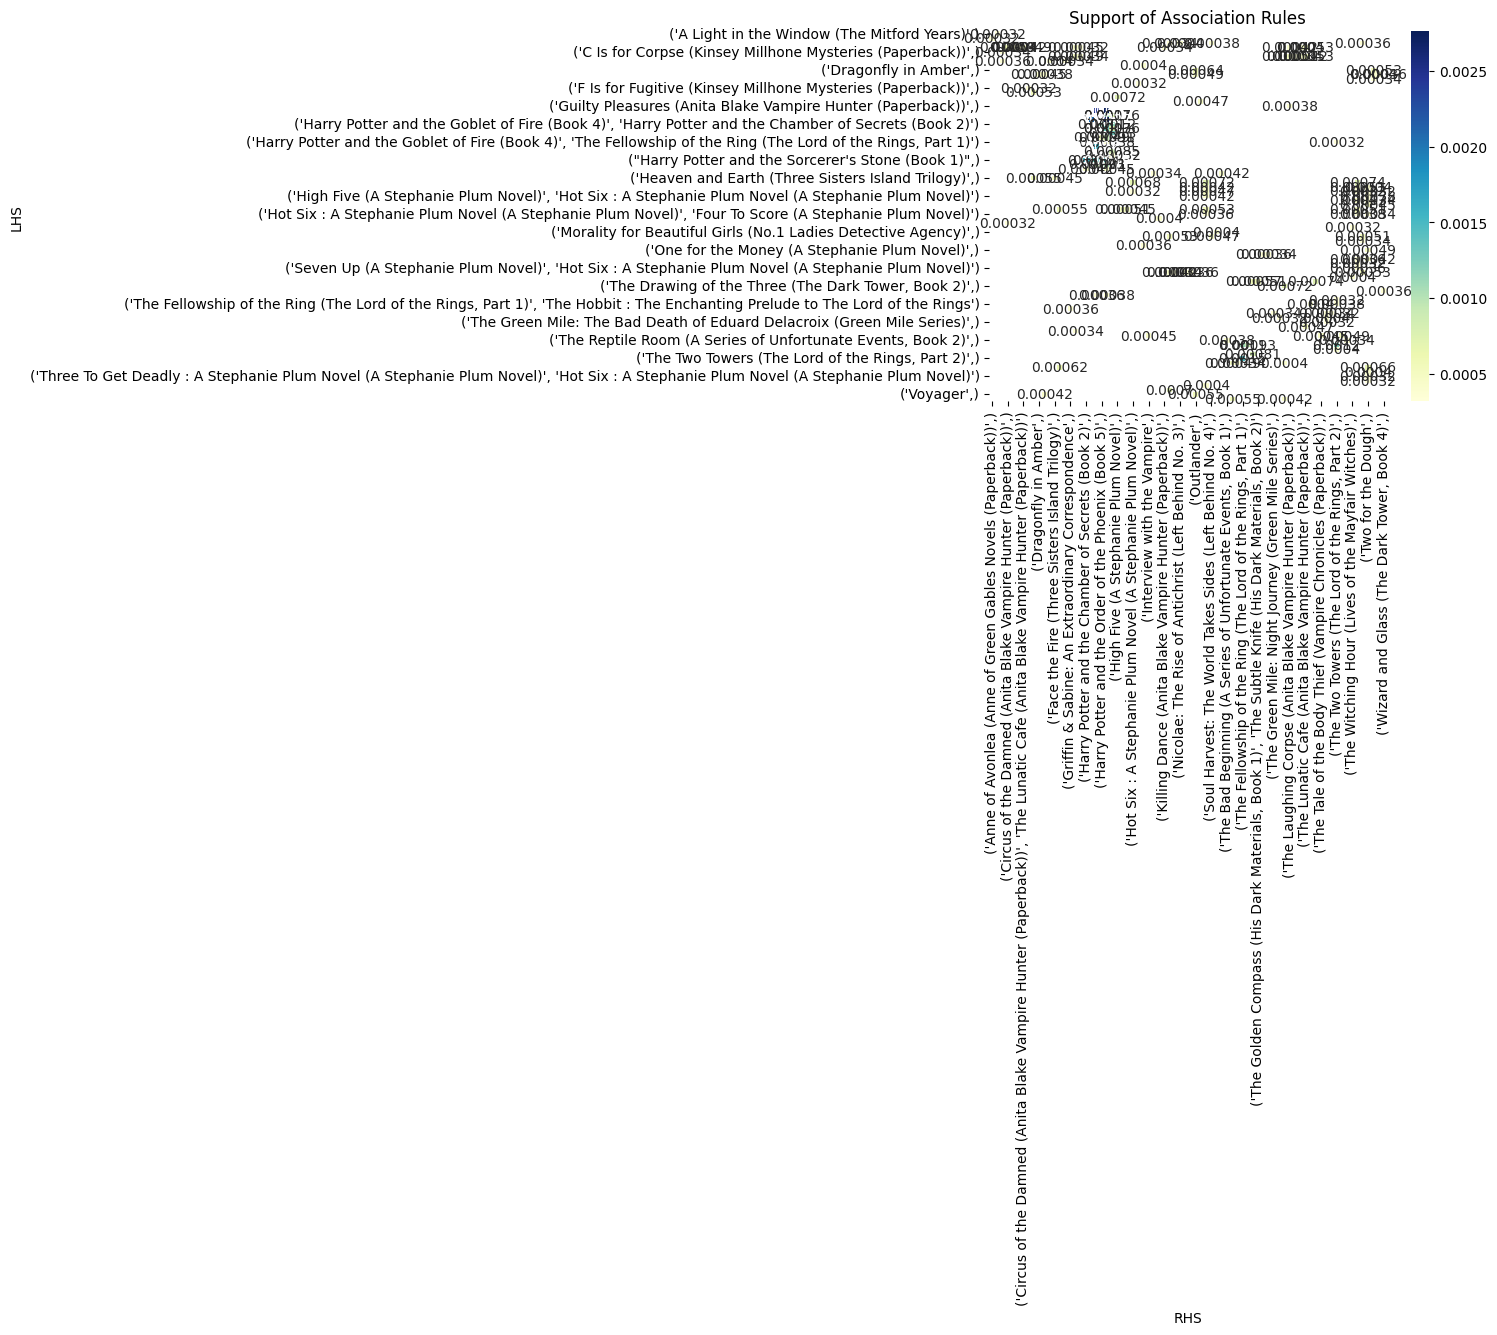

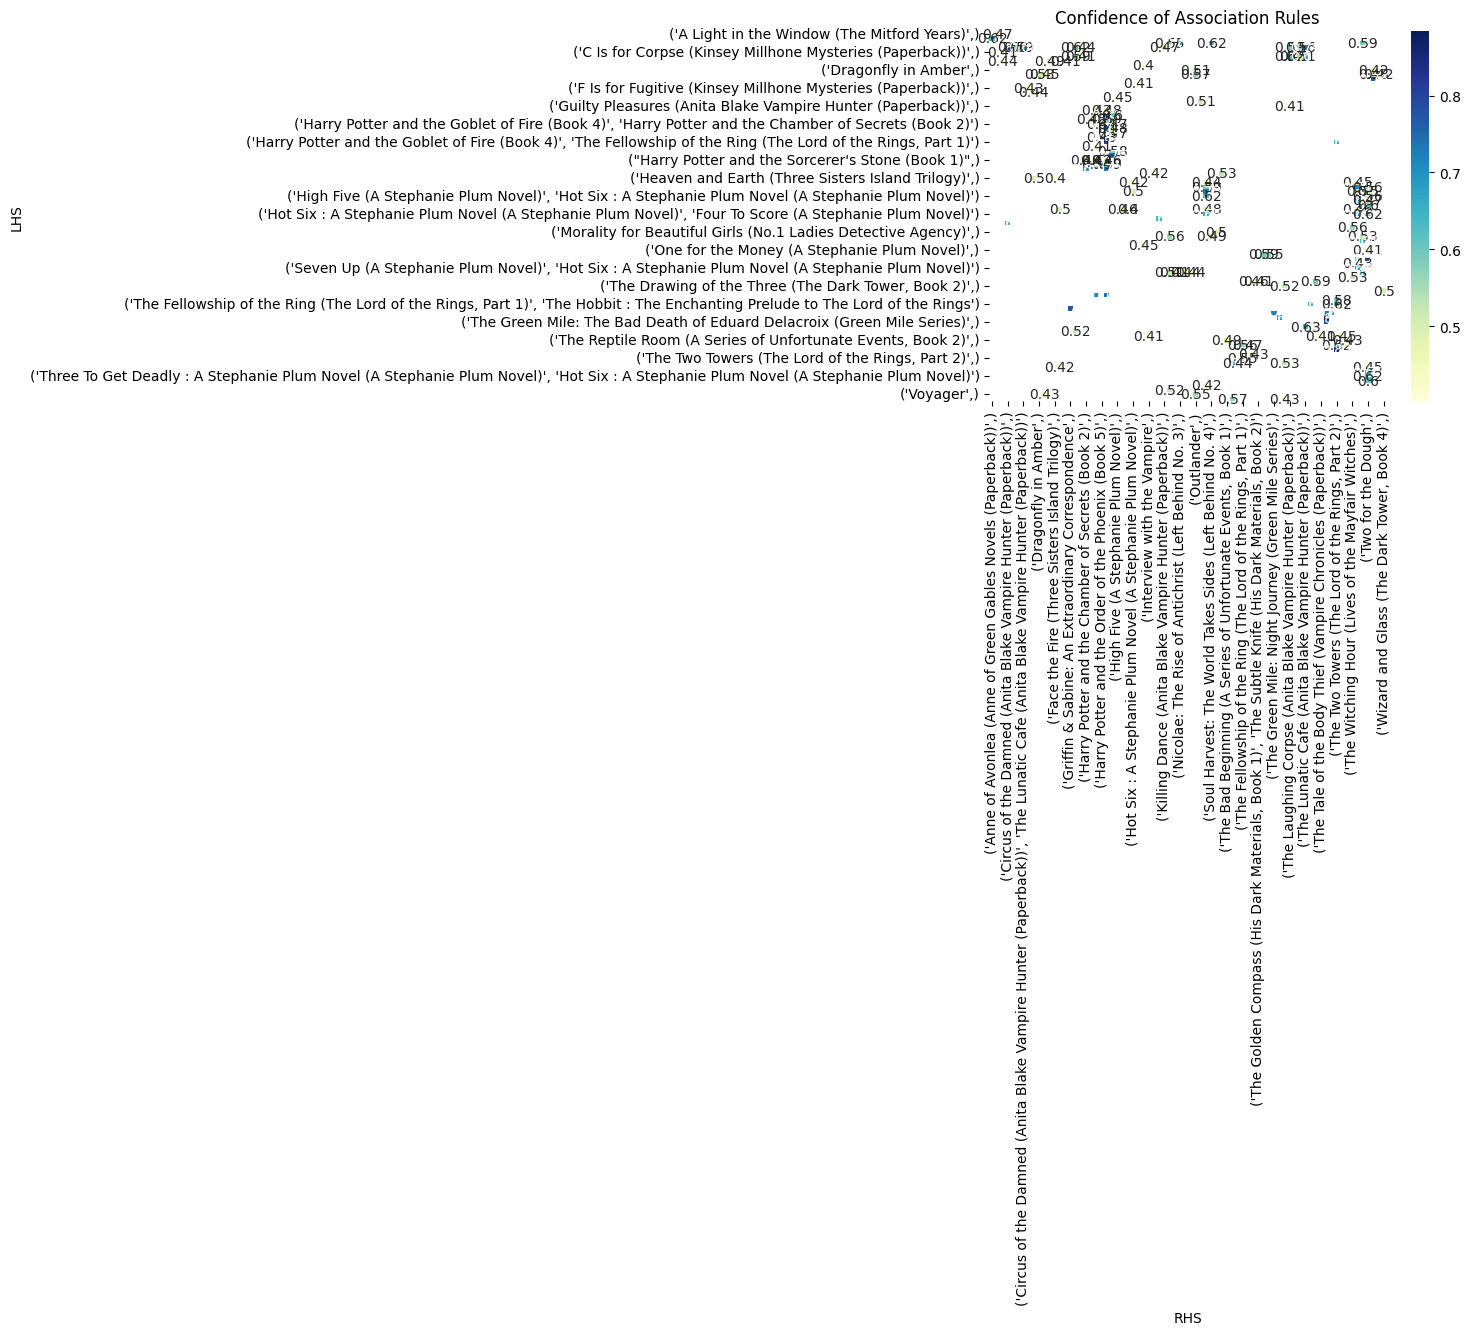

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#The first graph shows the frequency of occurrence of item combinations during the entire transaction, and the second graph shows the probability that other items will appear together when one given item is present.
# Assuming 'df' is your DataFrame with association rules
# 'Support' and 'Confidence' columns contain the respective values
# Purchase with an amount that includes more items of high value
# Create a heatmap to visualize support and confidence
# Assuming 'df' is your DataFrame with association rules
# 'LHS' and 'RHS' columns contain lists, and 'Support' and 'Confidence' columns contain the respective values

# Convert lists in 'LHS' and 'RHS' columns to tuples
df['LHS'] = df['LHS'].apply(tuple)
df['RHS'] = df['RHS'].apply(tuple)

# Create a heatmap to visualize support and confidence
sns.heatmap(data=df.pivot_table(index='LHS', columns='RHS', values='Support'), cmap="YlGnBu", annot=True)
plt.title("Support of Association Rules")
plt.show()

sns.heatmap(data=df.pivot_table(index='LHS', columns='RHS', values='Confidence'), cmap="YlGnBu", annot=True)
plt.title("Confidence of Association Rules")
plt.show()